In [7]:
install.packages("tidyverse")
install.packages("skimr")
install.packages("arsenal")
install.packages("janitor")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(tidyverse)
library(skimr)
library(arsenal)
library(janitor)
library(corrplot)

corrplot 0.95 loaded



In [20]:
#Leemos el dataset
data_path <- "/content/BankChurners.csv"
df <- read_csv(data_path)

Rows: 10127 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Ca...
dbl (17): CLIENTNUM, Customer_Age, Dependent_count, Months_on_book, Total_Re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
#Verificamos el dataset
head(df)
glimpse(df)

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,⋯,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,⋯,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,⋯,3418,0,3418,2.594,1887,20,2.333,0.000,2.1081e-05,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,⋯,3313,2517,796,1.405,1171,20,2.333,0.760,1.3366e-04,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,⋯,4716,0,4716,2.175,816,28,2.500,0.000,2.1676e-05,0.99998
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,⋯,4010,1247,2763,1.376,1088,24,0.846,0.311,5.5077e-05,0.99994


Rows: 10,127
Columns: 23
$ CLIENTNUM                                                                                                                          <dbl> …
$ Attrition_Flag                                                                                                                     <chr> …
$ Customer_Age                                                                                                                       <dbl> …
$ Gender                                                                                                                             <chr> …
$ Dependent_count                                                                                                                    <dbl> …
$ Education_Level                                                                                                                    <chr> …
$ Marital_Status                                                                                                                 

# **Limpieza y transformación**

In [15]:
# Nombres de las columnas: limpiar para que sean más fáciles de usar
data <- data %>%
  clean_names()

In [22]:
names(df)

[1] "CLIENTNUM"                                                                                                                         
 [2] "Attrition_Flag"                                                                                                                    
 [3] "Customer_Age"                                                                                                                      
 [4] "Gender"                                                                                                                            
 [5] "Dependent_count"                                                                                                                   
 [6] "Education_Level"                                                                                                                   
 [7] "Marital_Status"                                                                                                                    
 [8] "Income_Category"                                                                                                                   
 [9] "Card_Category"                                                                                                                     
[10] "Months_on_book"                                                                                                                    
[11] "Total_Relationship_Count"                                                                                                          
[12] "Months_Inactive_12_mon"                                                                                                            
[13] "Contacts_Count_12_mon"                                                                                                             
[14] "Credit_Limit"                                                                                                                      
[15] "Total_Revolving_Bal"                                                                                                               
[16] "Avg_Open_To_Buy"                                                                                                                   
[17] "Total_Amt_Chng_Q4_Q1"                                                                                                              
[18] "Total_Trans_Amt"                                                                                                                   
[19] "Total_Trans_Ct"                                                                                                                    
[20] "Total_Ct_Chng_Q4_Q1"                                                                                                               
[21] "Avg_Utilization_Ratio"                                                                                                             
[22] "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"
[23] "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"

In [23]:
# Tipos de datos y estructura
str(df)

spc_tbl_ [10,127 × 23] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ CLIENTNUM                                                                                                                         : num [1:10127] 7.69e+08 8.19e+08 7.14e+08 7.70e+08 7.09e+08 ...
 $ Attrition_Flag                                                                                                                    : chr [1:10127] "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age                                                                                                                      : num [1:10127] 45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                                                                                                                            : chr [1:10127] "M" "F" "M" "F" ...
 $ Dependent_count                                                                                                                   : num [1:10127] 3 5 3

In [59]:
#Estadística principales
summary(df)

   CLIENTNUM         Attrition_Flag      Customer_Age      Gender         
 Min.   :708082083   Length:10127       Min.   :26.00   Length:10127      
 1st Qu.:713036770   Class :character   1st Qu.:41.00   Class :character  
 Median :717926358   Mode  :character   Median :46.00   Mode  :character  
 Mean   :739177606                      Mean   :46.33                     
 3rd Qu.:773143533                      3rd Qu.:52.00                     
 Max.   :828343083                      Max.   :73.00                     
 Dependent_count Education_Level    Marital_Status     Income_Category   
 Min.   :0.000   Length:10127       Length:10127       Length:10127      
 1st Qu.:1.000   Class :character   Class :character   Class :character  
 Median :2.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2.346                                                           
 3rd Qu.:3.000                                                           
 Max.   :5.000                 

In [60]:
#Verificamos nulls
colSums(is.na(df))

CLIENTNUM 
                                                                                                                                 0 
                                                                                                                    Attrition_Flag 
                                                                                                                                 0 
                                                                                                                      Customer_Age 
                                                                                                                                 0 
                                                                                                                            Gender 
                                                                                                                                 0 
                                                                                                                   Dependent_count 
                                                                                                                                 0 
                                                                                                                   Education_Level 
                                                                                                                                 0 
                                                                                                                    Marital_Status 
                                                                                                                                 0 
                                                                                                                   Income_Category 
                                                                                                                                 0 
                                                                                                                     Card_Category 
                                                                                                                                 0 
                                                                                                                    Months_on_book 
                                                                                                                                 0 
                                                                                                          Total_Relationship_Count 
                                                                                                                                 0 
                                                                                                            Months_Inactive_12_mon 
                                                                                                                                 0 
                                                                                                             Contacts_Count_12_mon 
                                                                                                                                 0 
                                                                                                                      Credit_Limit 
                                                                                                                                 0 
                                                                                                               Total_Revolving_Bal 
                                                                                                                                 0 
                                                                                                                   Avg_Open_To_Buy 
                             

In [61]:
# Revisar valores únicos por variable categórica
df %>% select_if(is.character) %>% summarise_all(~n_distinct(.))

Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
<int>,<int>,<int>,<int>,<int>,<int>
2,2,7,4,6,4


In [66]:
# Convertir las columnas categóricas a factores para un mejor análisis y visualización

df <- df %>%
  mutate(
    attrition_flag = as.factor(attrition_flag),
    gender = as.factor(gender),
    education_level = as.factor(education_level),
    marital_status = as.factor(marital_status),
    income_category = as.factor(income_category),
    card_category = as.factor(card_category))

In [69]:
# Resumen estadístico específico para variables numéricas
# Excluimos CLIENTNUM si no es relevante como métrica estadística

df %>%
  select(where(is.numeric), -clientnum) %>%
  summary()

  customer_age   dependent_count months_on_book  total_relationship_count
 Min.   :26.00   Min.   :0.000   Min.   :13.00   Min.   :1.000           
 1st Qu.:41.00   1st Qu.:1.000   1st Qu.:31.00   1st Qu.:3.000           
 Median :46.00   Median :2.000   Median :36.00   Median :4.000           
 Mean   :46.33   Mean   :2.346   Mean   :35.93   Mean   :3.813           
 3rd Qu.:52.00   3rd Qu.:3.000   3rd Qu.:40.00   3rd Qu.:5.000           
 Max.   :73.00   Max.   :5.000   Max.   :56.00   Max.   :6.000           
 months_inactive_12_mon contacts_count_12_mon  credit_limit  
 Min.   :0.000          Min.   :0.000         Min.   : 1438  
 1st Qu.:2.000          1st Qu.:2.000         1st Qu.: 2555  
 Median :2.000          Median :2.000         Median : 4549  
 Mean   :2.341          Mean   :2.455         Mean   : 8632  
 3rd Qu.:3.000          3rd Qu.:3.000         3rd Qu.:11068  
 Max.   :6.000          Max.   :6.000         Max.   :34516  
 total_revolving_bal avg_open_to_buy total_amt_c

In [70]:
# Resumen para variables categóricas (conteo de niveles y distribución)
df %>%
  select(where(is.factor)) %>%
  map(summary) # Aplica summary a cada columna factor

$attrition_flag
Attrited Customer Existing Customer 
             1627              8500 

$gender
   F    M 
5358 4769 

$education_level
      College     Doctorate      Graduate   High School Post-Graduate 
         1013           451          3128          2013           516 
   Uneducated       Unknown 
         1487          1519 

$marital_status
Divorced  Married   Single  Unknown 
     748     4687     3943      749 

$income_category
       $120K +    $40K - $60K    $60K - $80K   $80K - $120K Less than $40K 
           727           1790           1402           1535           3561 
       Unknown 
          1112 

$card_category
    Blue     Gold Platinum   Silver 
    9436      116       20      555

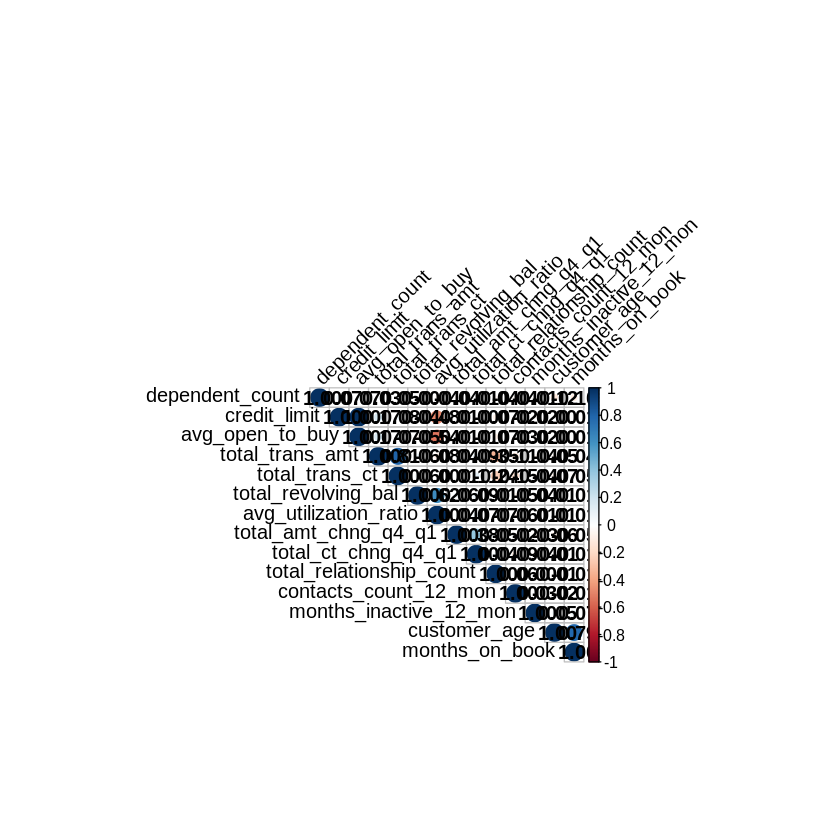

In [71]:
# Correlación entre variables numéricas
numeric_cols <- df %>%
  select(where(is.numeric),
         -clientnum,
         -matches("naive_bayes_classifier")) # Excluir las columnas largas de Naive Bayes
M <- cor(numeric_cols, use = "pairwise.complete.obs") # Ignora NAs
corrplot(M, method = "circle", type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45, addCoef.col = "black")

In [72]:
# Tasa de Attrition (abandono) por Género
df %>%
  group_by(gender, attrition_flag) %>%
  summarise(count = n()) %>%
  group_by(gender) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  arrange(gender, desc(percentage))

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,attrition_flag,count,percentage
<fct>,<fct>,<int>,<dbl>
F,Existing Customer,4428,82.64278
F,Attrited Customer,930,17.35722
M,Existing Customer,4072,85.38478
M,Attrited Customer,697,14.61522


In [73]:
# Ingreso promedio y monto total de transacciones por Nivel Educativo
df %>%
  group_by(education_level) %>%
  summarise(
    avg_total_trans_amt = mean(total_trans_amt, na.rm = TRUE),
    avg_credit_limit = mean(credit_limit, na.rm = TRUE),
    n = n()
  ) %>%
  arrange(desc(avg_total_trans_amt))

education_level,avg_total_trans_amt,avg_credit_limit,n
<fct>,<dbl>,<dbl>,<int>
Post-Graduate,4515.415,8862.560,516
Uneducated,4484.341,8899.509,1487
Unknown,4420.053,8491.799,1519
Graduate,4418.491,8566.101,3128
High School,4403.740,8605.824,2013
College,4255.807,8684.536,1013
Doctorate,4193.016,8413.259,451


In [74]:
# Comportamiento de transacciones según la categoría de tarjeta
df %>%
  group_by(card_category) %>%
  summarise(
    avg_total_trans_amt = mean(total_trans_amt, na.rm = TRUE),
    avg_total_trans_ct = mean(total_trans_ct, na.rm = TRUE),
    n = n()
  ) %>%
  arrange(desc(avg_total_trans_amt))

card_category,avg_total_trans_amt,avg_total_trans_ct,n
<fct>,<dbl>,<dbl>,<int>
Platinum,8999.750,86.95000,20
Gold,7685.612,81.51724,116
Silver,6590.483,74.70090,555
Blue,4225.407,64.02819,9436


In [75]:
# Relación entre Meses Inactivos y Conteo de Contactos con Attrition
df %>%
  group_by(months_inactive_12_mon, contacts_count_12_mon, attrition_flag) %>%
  summarise(count = n()) %>%
  ungroup() %>%
  arrange(months_inactive_12_mon, contacts_count_12_mon, attrition_flag)

`summarise()` has grouped output by 'months_inactive_12_mon',
'contacts_count_12_mon'. You can override using the `.groups` argument.


months_inactive_12_mon,contacts_count_12_mon,attrition_flag,count
<dbl>,<dbl>,<fct>,<int>
0,0,Existing Customer,2
0,1,Existing Customer,5
0,2,Attrited Customer,2
0,2,Existing Customer,3
0,3,Attrited Customer,7
0,3,Existing Customer,4
0,4,Attrited Customer,5
0,6,Attrited Customer,1
1,0,Existing Customer,100


# **Visualización**

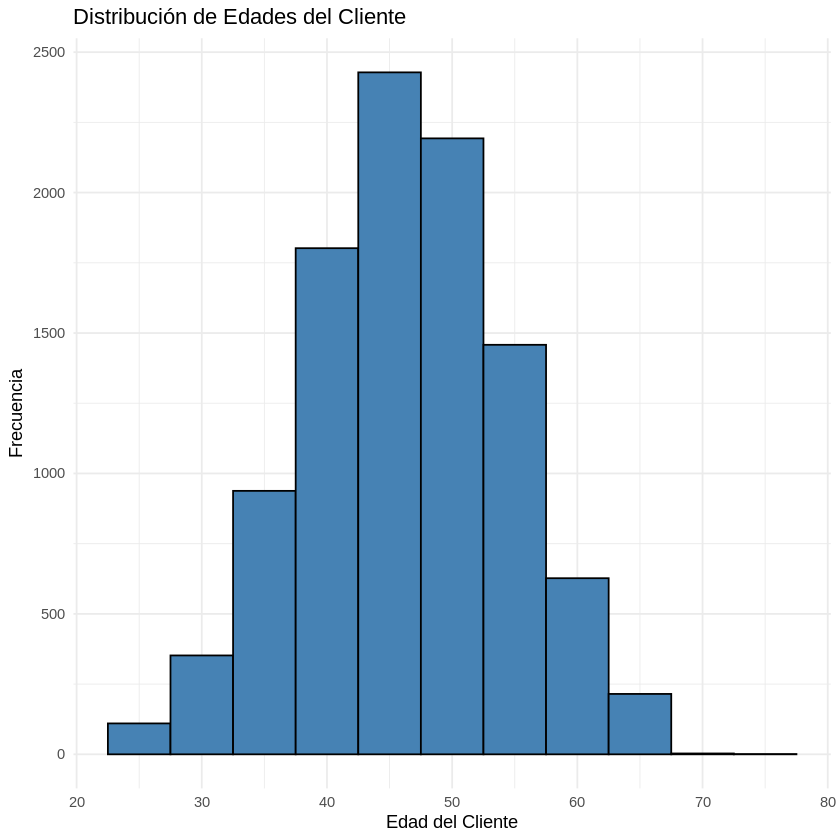

In [76]:
# Histograma de la edad del cliente
ggplot(df, aes(x = customer_age)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  labs(title = "Distribución de Edades del Cliente", x = "Edad del Cliente", y = "Frecuencia") +
  theme_minimal()

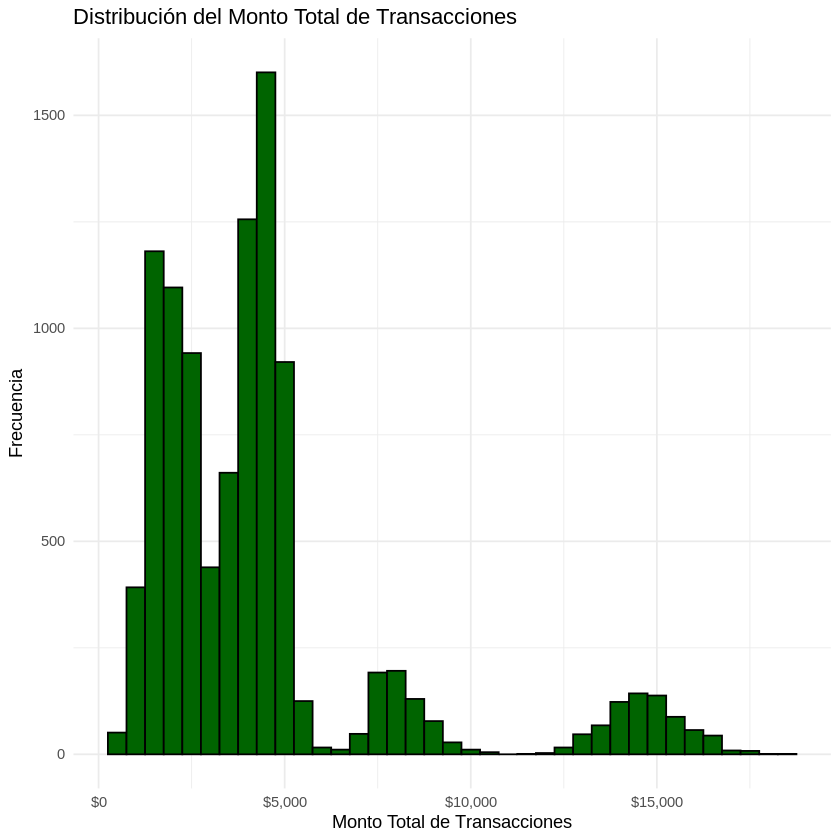

In [77]:
# Histograma del monto total de transacciones
ggplot(df, aes(x = total_trans_amt)) +
  geom_histogram(binwidth = 500, fill = "darkgreen", color = "black") +
  labs(title = "Distribución del Monto Total de Transacciones", x = "Monto Total de Transacciones", y = "Frecuencia") +
  theme_minimal() +
  scale_x_continuous(labels = scales::dollar)

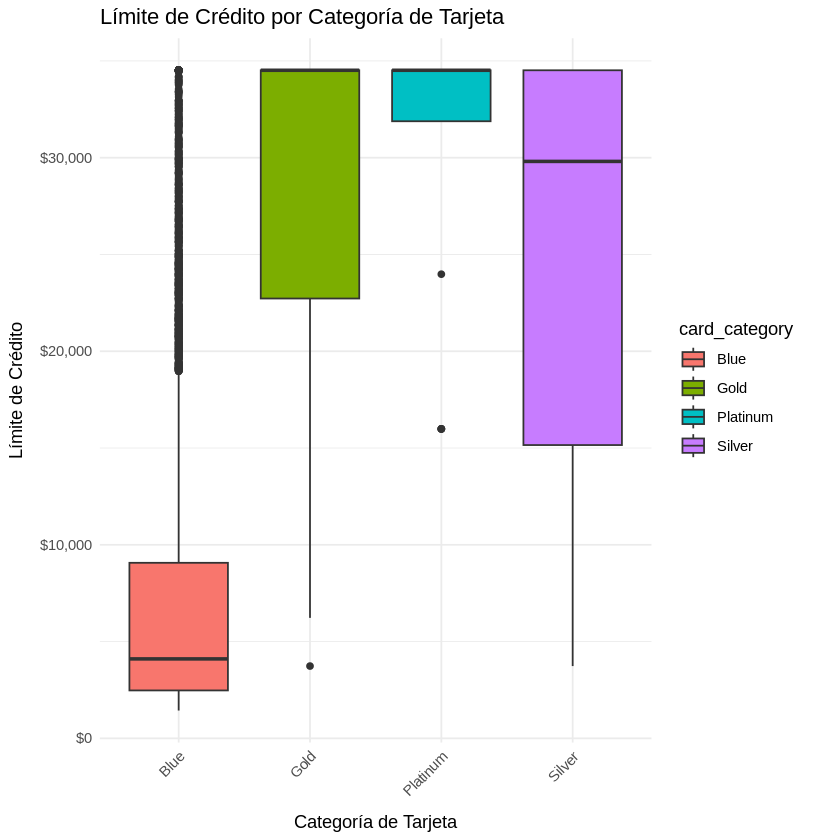

In [78]:
# Boxplot de Credit_Limit por Card_Category
ggplot(df, aes(x = card_category, y = credit_limit, fill = card_category)) +
  geom_boxplot() +
  labs(title = "Límite de Crédito por Categoría de Tarjeta", x = "Categoría de Tarjeta", y = "Límite de Crédito") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = scales::dollar)

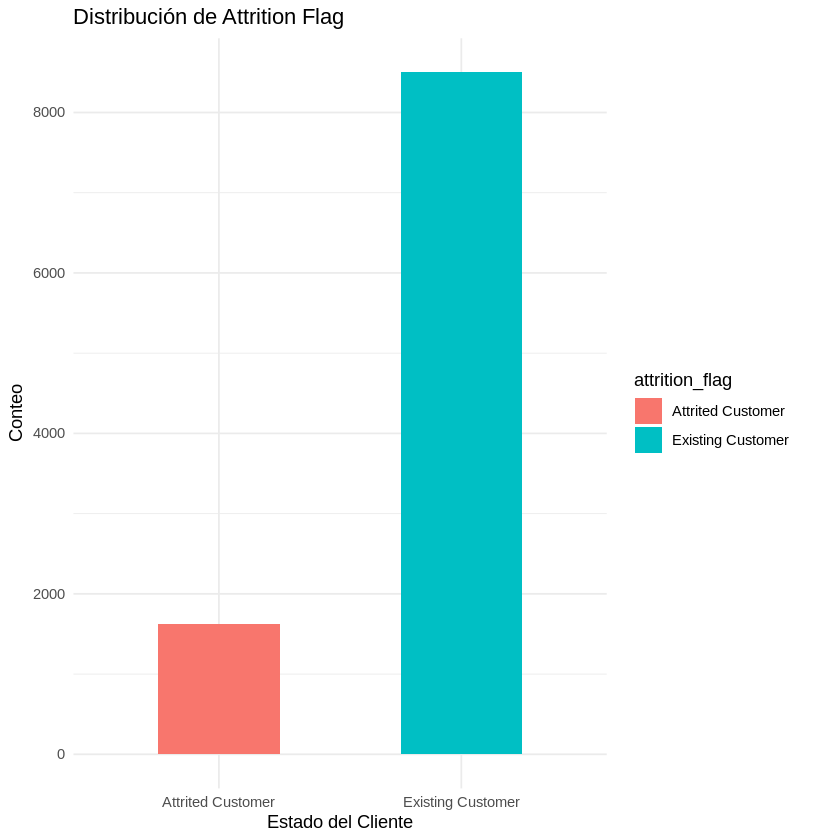

In [79]:
# Gráfico de barras de Attrition_Flag (Clientes existentes vs. Clientes que abandonaron)
ggplot(df, aes(x = attrition_flag, fill = attrition_flag)) +
  geom_bar(width = 0.5) +
  labs(title = "Distribución de Attrition Flag", x = "Estado del Cliente", y = "Conteo") +
  theme_minimal()

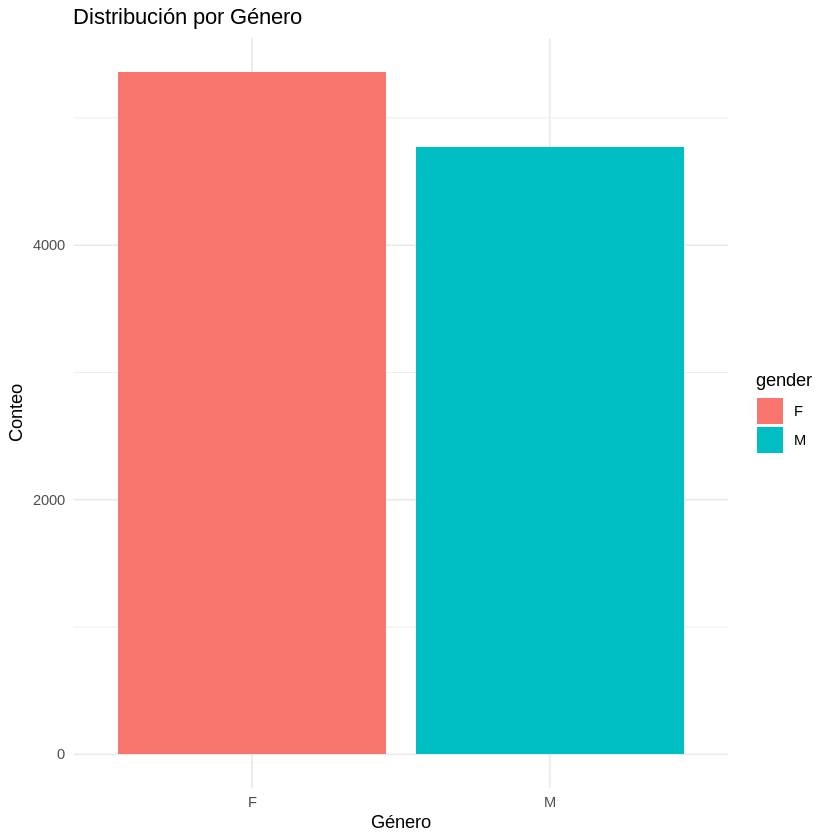

In [80]:
# Gráfico de barras de Gender
ggplot(df, aes(x = gender, fill = gender)) +
  geom_bar() +
  labs(title = "Distribución por Género", x = "Género", y = "Conteo") +
  theme_minimal()

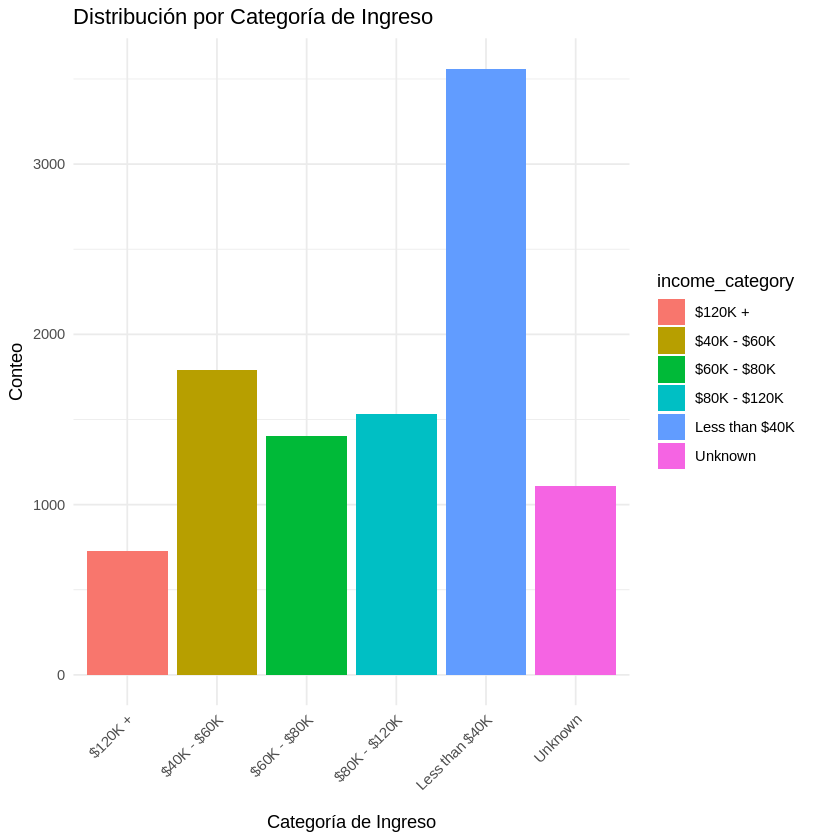

In [81]:
# Gráfico de barras de Income_Category
ggplot(df, aes(x = income_category, fill = income_category)) +
  geom_bar() +
  labs(title = "Distribución por Categoría de Ingreso", x = "Categoría de Ingreso", y = "Conteo") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

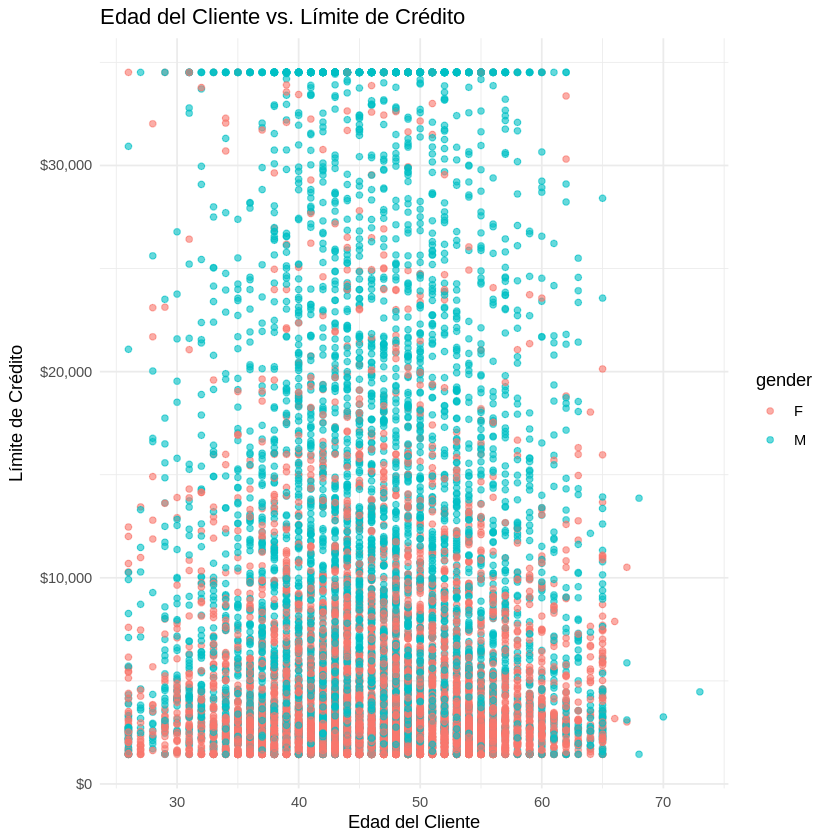

In [82]:
# Scatter plot: Customer_Age vs. Credit_Limit, coloreado por Gender
ggplot(df, aes(x = customer_age, y = credit_limit, color = gender)) +
  geom_point(alpha = 0.6) +
  labs(title = "Edad del Cliente vs. Límite de Crédito", x = "Edad del Cliente", y = "Límite de Crédito") +
  theme_minimal() +
  scale_y_continuous(labels = scales::dollar)

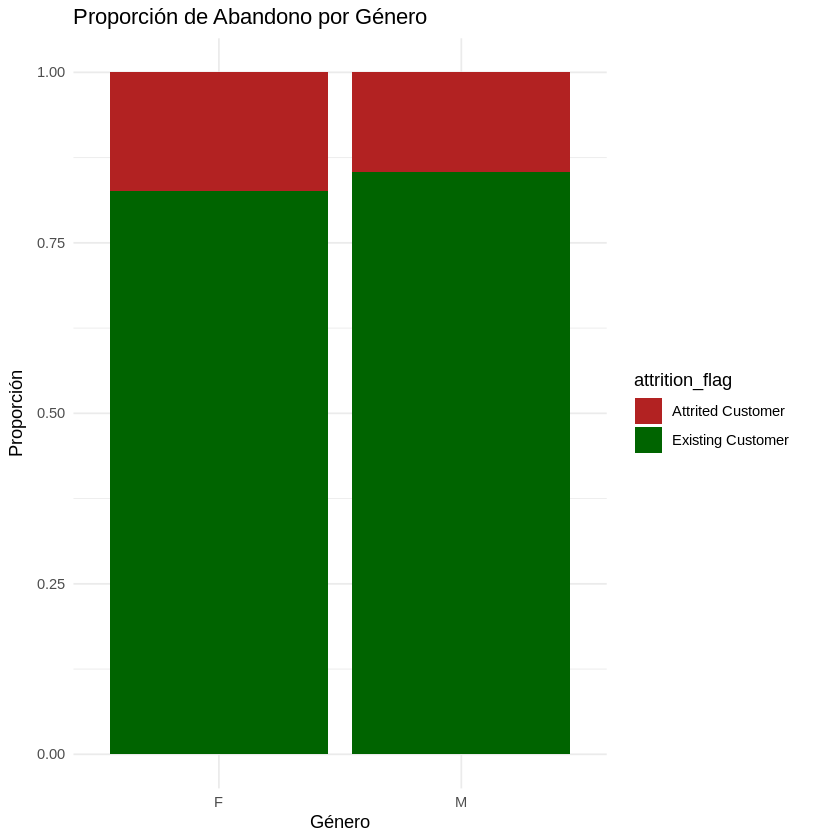

In [83]:
# Gráfico de barras apiladas: Attrition_Flag por Gender (proporciones)
ggplot(df, aes(x = gender, fill = attrition_flag)) +
  geom_bar(position = "fill") + # "fill" para mostrar proporciones
  labs(title = "Proporción de Abandono por Género", x = "Género", y = "Proporción") +
  theme_minimal() +
  scale_fill_manual(values = c("Existing Customer" = "darkgreen", "Attrited Customer" = "firebrick"))

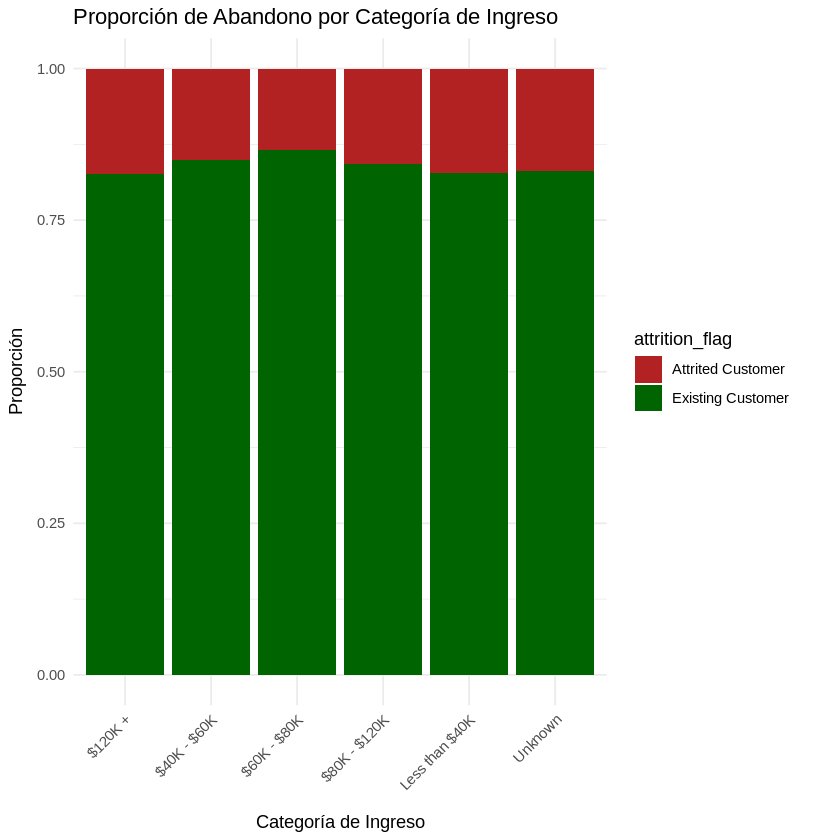

In [84]:
# Gráfico de barras apiladas: Attrition_Flag por Income_Category
ggplot(df, aes(x = income_category, fill = attrition_flag)) +
  geom_bar(position = "fill") +
  labs(title = "Proporción de Abandono por Categoría de Ingreso", x = "Categoría de Ingreso", y = "Proporción") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("Existing Customer" = "darkgreen", "Attrited Customer" = "firebrick"))

# **Conclusiones**

Estado del Cliente (Attrition Flag):

La mayoría de los clientes están activos.

Hay una minoría significativa que ha abandonado (churn), lo que es importante para análisis futuros.

--

Edad del Cliente:

La edad promedio se encuentra entre los 40 y 50 años.

No hay valores extremos ni datos atípicos evidentes en la edad.

--

Límite de Crédito:

Los clientes activos tienden a tener un mayor límite de crédito comparado con los inactivos.

Existen diferencias notables en la dispersión del límite de crédito entre los grupos.

--

Transacciones Totales:

Los clientes activos realizan más transacciones en promedio.

Los inactivos muestran un comportamiento transaccional más bajo y menos variado.

--

Datos limpios

No se detectaron valores faltantes (NA).

Las variables están bien estructuradas para un análisis más profundo.